In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
import seaborn as sns
plt.rcParams['font.size'] = 24
sns.set(font_scale = 2)

In [2]:
df = pd.read_excel('C:\\Users\\Semen\\Desktop\\2022\\3 semestr\\AI\\2013_nyc_ll84_disclosure.xlsx')
df.head()

2012 NYC Benchmark Data


,BBL,Street Number,Street Name,Borough,Zip,Benchmarking Submission,Entry Number,Site EUI\n(kBtu/ft2),Weather Normalized Source EUI\n(kBtu/ft2),Indoor Water Intensity (All Water Sources)\n(gal/ft2),Reported Water Method,ENERGY STAR Score,Total GHG Emissions\n(MtCO2e),Property Floor Area (Buildngs and Parking)\n(ft2),Primary Property Type - Self Selected,Number of Buildings,Reported BINs
0,1000010010,1,GOVERNORS ISLAND,MANHATTAN,10004,No Record as of 08/1/13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
1,1000020002,NaN,MARGINAL STREET,MANHATTAN,10004,No Record as of 08/1/13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,1000047501,1,WATER STREET,MANHATTAN,10004,Yes,41.0,102.0,287.9,16.370000,Manual,75,25932.68,2428325.0,Office,1,1000005
3,1000057501,125,BROAD STREET,MANHATTAN,10004,Yes,3871.0,119.6,261.5,NaN,Manual,70,11637.42,1338000.0,Office,1,1000006
4,1003620001,134,AVENUE D,MANHATTAN,10009,Yes,8312.0,30.3,85.7,1.571029,ABS,NaN,13709.99,5207812.0,Multifamily Housing,7,1077504;1077538;1077539;1077540;1077541;107754...


In [3]:
feature_A = 'BBL'
feature_D = 'Borough'
feature_H = 'Site EUI\n(kBtu/ft2)'
feature_K = 'Reported Water Method'
feature_M = 'Total GHG Emissions\n(MtCO2e)'
feature_P = 'Number of Buildings'
feature_L = 'ENERGY STAR Score'
df = df[[feature_A, feature_D, feature_H, feature_K, feature_M, feature_P, feature_L]]

In [4]:
df.shape

(14112, 7)

In [5]:
df = df.dropna(subset=[feature_L])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1872 entries, 2 to 14103
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   BBL                           1872 non-null   int64  
 1   Borough                       1872 non-null   object 
 2   Site EUI
(kBtu/ft2)           1871 non-null   float64
 3   Reported Water Method         1872 non-null   object 
 4   Total GHG Emissions
(MtCO2e)  1869 non-null   float64
 5   Number of Buildings           1872 non-null   int64  
 6   ENERGY STAR Score             1872 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 117.0+ KB


In [6]:
df[feature_L].unique()

array([75, 70, 55, 82, 41, 36, 90, 67, 80, 96, 72, 78, 88, 39, 60, 51, 50,
       76, 1, 65, 100, 79, 'Exempt', 84, 34, 74, 68, 77, 93, 89, 94, 92,
       61, 95, 35, 21, 59, 48, 49, 19, 54, 56, 81, 86, 69, 98, 14, 8, 29,
       45, 52, 27, 40, 31, 30, 71, 32, 9, 22, 20, 87, 15, 37, 91, 83, 58,
       5, 97, 64, 73, 10, 43, 12, 2, 85, 99, 42, 6, 4, 63, 44, 62, 17, 24,
       66, 26, 23, 38, 57, 16, 33, 47, 28, 53, 11, 3, 18, 46, 7, 25, 13],
      dtype=object)

In [7]:
df[feature_L] = pd.to_numeric(df[feature_L], errors = 'coerce')
df = df.dropna(subset=[feature_L])
df.info()
df.to_excel('C:\\Users\\Semen\\Desktop\\2022\\3 semestr\\AI\\AI3_cut.xlsx', index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1864 entries, 2 to 14103
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   BBL                           1864 non-null   int64  
 1   Borough                       1864 non-null   object 
 2   Site EUI
(kBtu/ft2)           1863 non-null   float64
 3   Reported Water Method         1864 non-null   object 
 4   Total GHG Emissions
(MtCO2e)  1861 non-null   float64
 5   Number of Buildings           1864 non-null   int64  
 6   ENERGY STAR Score             1864 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 116.5+ KB


In [8]:
df.describe()

,BBL,Site EUI\n(kBtu/ft2),Total GHG Emissions\n(MtCO2e),Number of Buildings,ENERGY STAR Score
count,1.864000e+03,1863.000000,1.861000e+03,1864.000000,1864.000000
mean,1.829675e+09,932.978422,1.509212e+04,1.399142,62.752682
std,1.244687e+09,13156.235773,1.965322e+05,2.360554,29.283619
min,1.000048e+09,0.300000,2.010000e+00,0.000000,1.000000
25%,1.008340e+09,55.300000,4.309800e+02,1.000000,43.000000
50%,1.012840e+09,78.600000,9.201600e+02,1.000000,71.000000
75%,3.005418e+09,112.050000,2.241750e+03,1.000000,87.000000
max,5.074810e+09,494449.300000,5.913995e+06,26.000000,100.000000


In [9]:
pd.isna(df[feature_M]).sum()

3

In [10]:
####### Заполним одно недостающее значение 'Total GHG Emissions\n(MtCO2e)' по среднему значению столбца
df[feature_M] = pd.to_numeric(df[feature_M], errors='coerce').astype('Float64')
df[feature_M] = df[feature_M].fillna(df[feature_M].mean())
pd.isna(df[feature_M]).sum()

0

In [11]:
####### Заполним одно недостающее значение 'Site EUI\n(kBtu/ft2)' по среднему значению столбца
df[feature_H] = pd.to_numeric(df[feature_H], errors='coerce').astype('Float64')
df[feature_H] = df[feature_H].fillna(df[feature_H].mean())
pd.isna(df[feature_H]).sum()

0

In [12]:
df.describe()

,BBL,Site EUI\n(kBtu/ft2),Total GHG Emissions\n(MtCO2e),Number of Buildings,ENERGY STAR Score
count,1.864000e+03,1864.0,1864.0,1864.000000,1864.000000
mean,1.829675e+09,932.978422,15092.117775,1.399142,62.752682
std,1.244687e+09,13152.704372,196373.903751,2.360554,29.283619
min,1.000048e+09,0.3,2.01,0.000000,1.000000
25%,1.008340e+09,55.3,432.0075,1.000000,43.000000
50%,1.012840e+09,78.6,928.755,1.000000,71.000000
75%,3.005418e+09,112.125,2252.6625,1.000000,87.000000
max,5.074810e+09,494449.3,5913995.09,26.000000,100.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1864 entries, 2 to 14103
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   BBL                           1864 non-null   int64  
 1   Borough                       1864 non-null   object 
 2   Site EUI
(kBtu/ft2)           1864 non-null   Float64
 3   Reported Water Method         1864 non-null   object 
 4   Total GHG Emissions
(MtCO2e)  1864 non-null   Float64
 5   Number of Buildings           1864 non-null   int64  
 6   ENERGY STAR Score             1864 non-null   float64
dtypes: Float64(2), float64(1), int64(2), object(2)
memory usage: 120.1+ KB


In [14]:
df.corr(numeric_only=True)[feature_L].sort_values()

Number of Buildings             -0.151086
Total GHG Emissions\n(MtCO2e)   -0.139871
Site EUI\n(kBtu/ft2)            -0.137835
BBL                             -0.083304
ENERGY STAR Score                1.000000
Name: ENERGY STAR Score, dtype: float64

In [15]:
def delete_anomaly(df, feature):
    first_quartile = df[feature].describe()['25%']
    third_quartile = df[feature].describe()['75%']
    iqr = third_quartile - first_quartile
    lower_limit = first_quartile - 1.5 * iqr
    upper_limit = third_quartile + 1.5 * iqr
    df = df[(df[feature] > lower_limit) & (df[feature] < upper_limit)]
    return df

In [16]:
df = delete_anomaly(df, feature_H)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1717 entries, 2 to 14103
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   BBL                           1717 non-null   int64  
 1   Borough                       1717 non-null   object 
 2   Site EUI
(kBtu/ft2)           1717 non-null   Float64
 3   Reported Water Method         1717 non-null   object 
 4   Total GHG Emissions
(MtCO2e)  1717 non-null   Float64
 5   Number of Buildings           1717 non-null   int64  
 6   ENERGY STAR Score             1717 non-null   float64
dtypes: Float64(2), float64(1), int64(2), object(2)
memory usage: 110.7+ KB


In [18]:
df.corr(numeric_only=True)[feature_L].sort_values()

Site EUI\n(kBtu/ft2)            -0.649168
Number of Buildings             -0.140789
Total GHG Emissions\n(MtCO2e)   -0.083494
BBL                             -0.080474
ENERGY STAR Score                1.000000
Name: ENERGY STAR Score, dtype: float64

In [19]:
df = delete_anomaly(df, feature_A)
df = delete_anomaly(df, feature_M)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1506 entries, 6 to 14103
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   BBL                           1506 non-null   int64  
 1   Borough                       1506 non-null   object 
 2   Site EUI
(kBtu/ft2)           1506 non-null   Float64
 3   Reported Water Method         1506 non-null   object 
 4   Total GHG Emissions
(MtCO2e)  1506 non-null   Float64
 5   Number of Buildings           1506 non-null   int64  
 6   ENERGY STAR Score             1506 non-null   float64
dtypes: Float64(2), float64(1), int64(2), object(2)
memory usage: 97.1+ KB


In [21]:
df.corr(numeric_only=True)[feature_L].sort_values()

Site EUI\n(kBtu/ft2)            -0.661515
Total GHG Emissions\n(MtCO2e)   -0.185402
Number of Buildings             -0.147142
BBL                             -0.083544
ENERGY STAR Score                1.000000
Name: ENERGY STAR Score, dtype: float64

In [22]:
df.describe()

,BBL,Site EUI\n(kBtu/ft2),Total GHG Emissions\n(MtCO2e),Number of Buildings,ENERGY STAR Score
count,1.506000e+03,1506.0,1506.0,1506.000000,1506.000000
mean,1.893997e+09,75.568924,987.799044,1.345286,66.673971
std,1.266632e+09,39.995594,869.40538,2.289431,27.344522
min,1.000090e+09,0.3,2.01,0.000000,1.000000
25%,1.008340e+09,49.7,375.8825,1.000000,49.000000
50%,1.012895e+09,71.8,698.625,1.000000,74.000000
75%,3.021065e+09,96.8,1345.44,1.000000,89.000000
max,5.074810e+09,196.4,4074.64,25.000000,100.000000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1506 entries, 6 to 14103
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   BBL                           1506 non-null   int64  
 1   Borough                       1506 non-null   object 
 2   Site EUI
(kBtu/ft2)           1506 non-null   Float64
 3   Reported Water Method         1506 non-null   object 
 4   Total GHG Emissions
(MtCO2e)  1506 non-null   Float64
 5   Number of Buildings           1506 non-null   int64  
 6   ENERGY STAR Score             1506 non-null   float64
dtypes: Float64(2), float64(1), int64(2), object(2)
memory usage: 97.1+ KB


In [24]:
# One hot encode
ohe_tmp = df[[feature_D, feature_K]]
ohe_tmp.tail()

,Borough,Reported Water Method
14087,STATEN ISLAND,ABS
14094,STATEN ISLAND,Manual
14097,STATEN ISLAND,Manual
14099,STATEN ISLAND,Manual
14103,STATEN ISLAND,Manual


In [25]:
ohe_tmp = pd.get_dummies(ohe_tmp)
ohe_tmp.head()

,Borough_BRONX,Borough_BROOKLYN,Borough_MANHATTAN,Borough_QUEENS,Borough_STATEN ISLAND,Reported Water Method_ABS,Reported Water Method_Manual
6,0,0,1,0,0,0,1
9,0,0,1,0,0,0,1
10,0,0,1,0,0,0,1
12,0,0,1,0,0,1,0
13,0,0,1,0,0,0,1


In [26]:
df = pd.concat([df.drop(columns={feature_D, feature_K}, axis = 1), ohe_tmp], axis = 1)
df.head()

,BBL,Site EUI\n(kBtu/ft2),Total GHG Emissions\n(MtCO2e),Number of Buildings,ENERGY STAR Score,Borough_BRONX,Borough_BROOKLYN,Borough_MANHATTAN,Borough_QUEENS,Borough_STATEN ISLAND,Reported Water Method_ABS,Reported Water Method_Manual
6,1000090014,79.7,4033.53,1,82.0,0,0,1,0,0,0,1
9,1000100016,39.8,1405.66,1,90.0,0,0,1,0,0,0,1
10,1000100023,102.8,2939.91,1,67.0,0,0,1,0,0,0,1
12,1012900021,71.8,3091.99,1,80.0,0,0,1,0,0,1,0
13,1000110021,52.6,2254.53,1,96.0,0,0,1,0,0,0,1


In [27]:
# Дропнем столбец BBL, тк это идентификатор
#df = df.drop([feature_A], axis = 1)
#df.head()

In [28]:
df.corr(numeric_only=True)[feature_L].sort_values()

Site EUI\n(kBtu/ft2)            -0.661515
Total GHG Emissions\n(MtCO2e)   -0.185402
Number of Buildings             -0.147142
BBL                             -0.083544
Borough_BRONX                   -0.073318
Borough_QUEENS                  -0.066771
Reported Water Method_Manual    -0.066288
Borough_BROOKLYN                -0.037495
Borough_STATEN ISLAND            0.020355
Reported Water Method_ABS        0.066288
Borough_MANHATTAN                0.107570
ENERGY STAR Score                1.000000
Name: ENERGY STAR Score, dtype: float64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1506 entries, 6 to 14103
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   BBL                           1506 non-null   int64  
 1   Site EUI
(kBtu/ft2)           1506 non-null   Float64
 2   Total GHG Emissions
(MtCO2e)  1506 non-null   Float64
 3   Number of Buildings           1506 non-null   int64  
 4   ENERGY STAR Score             1506 non-null   float64
 5   Borough_BRONX                 1506 non-null   uint8  
 6   Borough_BROOKLYN              1506 non-null   uint8  
 7   Borough_MANHATTAN             1506 non-null   uint8  
 8   Borough_QUEENS                1506 non-null   uint8  
 9   Borough_STATEN ISLAND         1506 non-null   uint8  
 10  Reported Water Method_ABS     1506 non-null   uint8  
 11  Reported Water Method_Manual  1506 non-null   uint8  
dtypes: Float64(2), float64(1), int64(2), uint8(7)
memory usage: 8

In [45]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model, metrics
from sklearn.metrics import accuracy_score, classification_report

In [114]:
labels = df[feature_L]
labels = np.where(labels > 70, 1, 0)
data = df.drop([feature_L], axis = 1)

In [115]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 7)



print(X_train.shape)
print(type(X_test.shape))
print(y_train)
print(type(y_test))

(1204, 11)
<class 'tuple'>
[0 1 1 ... 0 1 1]
<class 'numpy.ndarray'>


In [117]:
from sklearn.tree import DecisionTreeClassifier

Параметр min_samples_leaf в деревьях решений определяет минимальное количество образцов (samples), которые должны находиться в листовом узле (leaf node). Другими словами, это минимальное количество образцов данных, которое должно быть в каждом "листе" (конечном узле дерева), когда дерево принимает решение

Если значение этого параметра задано как целое число, то оно рассматривается как абсолютное количество образцов. Если значение задано как число с плавающей точкой (float), то min_samples_leaf рассматривается как долю от общего количества образцов, и итоговое число образцов в листовом узле будет равно ceil(min_samples_leaf * n_samples), где n_samples - это общее количество образцов

In [118]:
tree = DecisionTreeClassifier(min_samples_leaf=10)
tree.fit(X_train, y_train)
predictions = tree.predict(X_test)
accuracy = metrics.accuracy_score(y_test, predictions)
accuracy

0.7450331125827815

In [119]:
predictions[:10]

array([1, 1, 0, 0, 1, 0, 1, 0, 0, 1])

In [120]:
y_test[:10]

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1])

In [121]:
from sklearn import ensemble

In [131]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 7)


min_samples_split : integer, optional (default=2)

The minimum number of samples required to split an internal node. Note: this parameter is tree-specific.

In [137]:
rf = ensemble.RandomForestClassifier(min_samples_split = 8)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
rf_accuracy = metrics.accuracy_score(y_test, rf_predictions)
rf_accuracy

0.7913907284768212

In [138]:
importances = rf.feature_importances_
importances

array([0.19392366, 0.53040615, 0.19766391, 0.02026529, 0.0044679 ,
       0.0058055 , 0.01293166, 0.01115908, 0.00711398, 0.00857902,
       0.00768384])

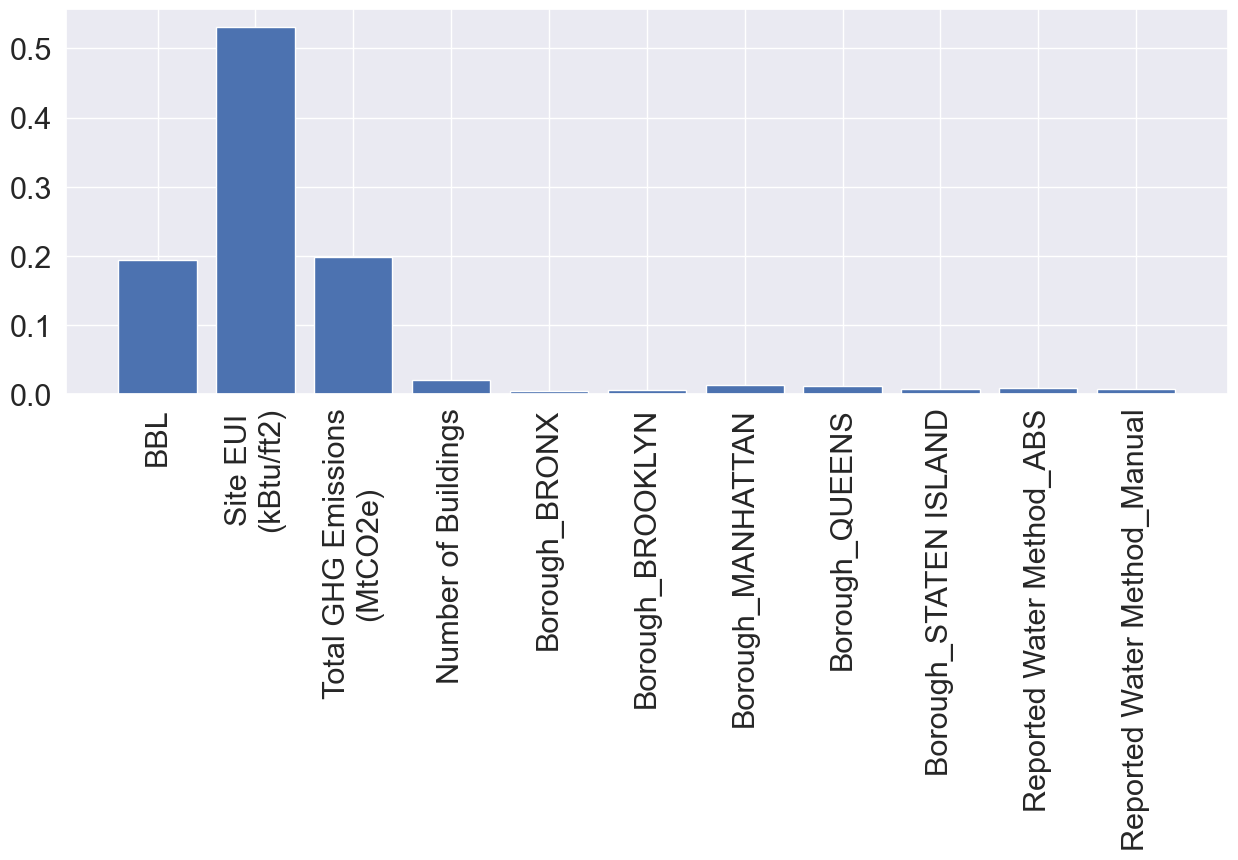

In [139]:
plt.figure(figsize=(15, 5))
plt.bar(range(len(importances)), importances, tick_label=X_train.columns)
plt.xticks(rotation=90)
plt.show()